# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
# YOUR CODE HERE
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}' 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    # YOUR CODE HERE

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | mozarlandia
Processing Record 3 of Set 1 | huaquillas
Processing Record 4 of Set 1 | greenville
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | raduzhny
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | college
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | gadzhiyevo
Processing Record 11 of Set 1 | stanley
Processing Record 12 of Set 1 | santa terezinha
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | laojunmiao
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | kabinda
Processing Record 18 of Set 1 | de soto
Processing Record 19 of Set 1 | nova sintra
Processing Record 20 of Set 1 | hawaiian paradise park
Processing Record 21 of Set 1 | tura
Processing Record 22 of Set 1

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.7435,-97.8558,-19.91,71,0,7.72,CA,1738718325
1,mozarlandia,-14.7447,-50.5706,22.87,91,92,1.63,BR,1738718326
2,huaquillas,-3.4833,-80.2333,27.13,78,75,2.57,EC,1738718328
3,greenville,35.6127,-77.3663,14.01,80,6,6.26,US,1738718137
4,port-aux-francais,-49.3500,70.2167,5.88,98,100,9.41,TF,1738718330


In [8]:
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s')).dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.7435,-97.8558,-19.91,71,0,7.72,CA,2025-02-05
1,mozarlandia,-14.7447,-50.5706,22.87,91,92,1.63,BR,2025-02-05
2,huaquillas,-3.4833,-80.2333,27.13,78,75,2.57,EC,2025-02-05
3,greenville,35.6127,-77.3663,14.01,80,6,6.26,US,2025-02-05
4,port-aux-francais,-49.3500,70.2167,5.88,98,100,9.41,TF,2025-02-05


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,-19.91,71,0,7.72,CA,2025-02-05
1,mozarlandia,-14.7447,-50.5706,22.87,91,92,1.63,BR,2025-02-05
2,huaquillas,-3.4833,-80.2333,27.13,78,75,2.57,EC,2025-02-05
3,greenville,35.6127,-77.3663,14.01,80,6,6.26,US,2025-02-05
4,port-aux-francais,-49.3500,70.2167,5.88,98,100,9.41,TF,2025-02-05


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

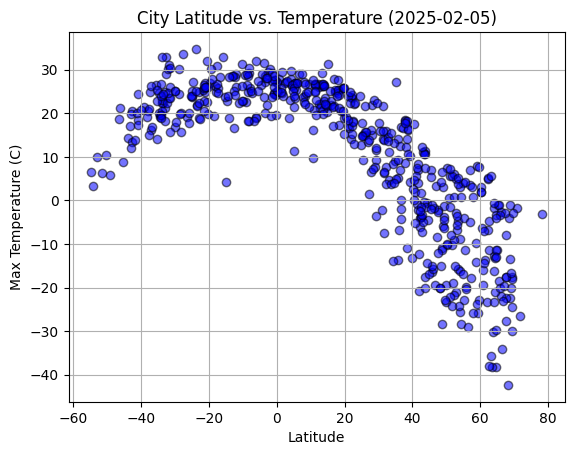

In [11]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', facecolors='b', alpha=0.55, edgecolors='k')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Temperature ({date})")
#plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

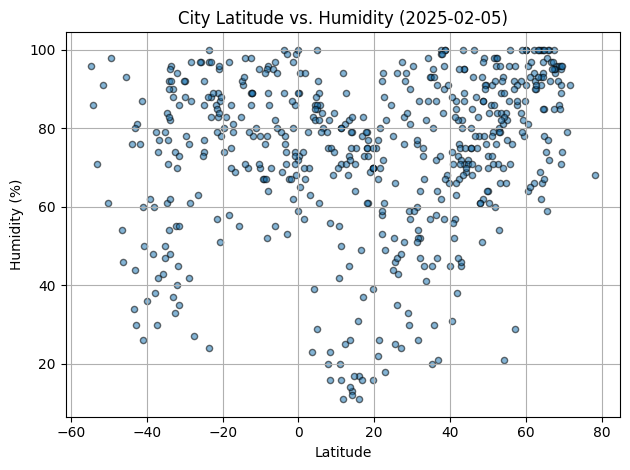

In [14]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True,\
                  facecolors='b', alpha=0.55, edgecolors='k', title=f'City Latitude vs. Humidity ({date})')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

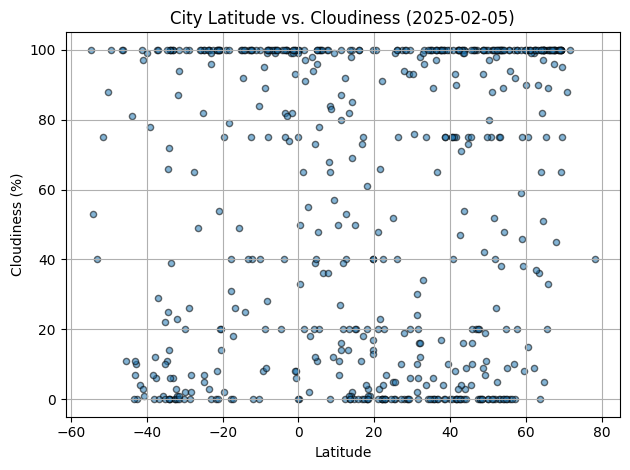

In [15]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True,\
                  facecolors='b', alpha=0.55, edgecolors='k', title=f'City Latitude vs. Cloudiness ({date})')

# Incorporate the other graph properties
# YOUR CODE 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

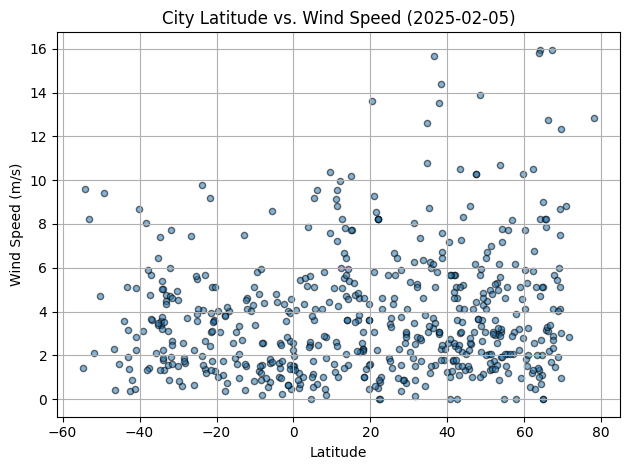

In [16]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', grid=True,\
                  facecolors='b', alpha=0.55, edgecolors='k', title=f'City Latitude vs. Wind Speed ({date})')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,-19.91,71,0,7.72,CA,2025-02-05
3,greenville,35.6127,-77.3663,14.01,80,6,6.26,US,2025-02-05
5,raduzhny,62.0961,77.4750,-23.31,100,99,1.21,RU,2025-02-05
7,college,64.8569,-147.8028,-11.41,78,100,0.00,US,2025-02-05
9,gadzhiyevo,69.2551,33.3362,-17.47,95,100,7.49,RU,2025-02-05


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mozarlandia,-14.7447,-50.5706,22.87,91,92,1.63,BR,2025-02-05
2,huaquillas,-3.4833,-80.2333,27.13,78,75,2.57,EC,2025-02-05
4,port-aux-francais,-49.3500,70.2167,5.88,98,100,9.41,TF,2025-02-05
6,east london,-33.0153,27.9116,24.95,90,100,4.77,ZA,2025-02-05
8,grytviken,-54.2811,-36.5092,3.31,86,53,9.59,GS,2025-02-05


###  Temperature vs. Latitude Linear Regression Plot

Linear equation: y = -0.73x + 31.96
The r-value is: -0.845217639213458


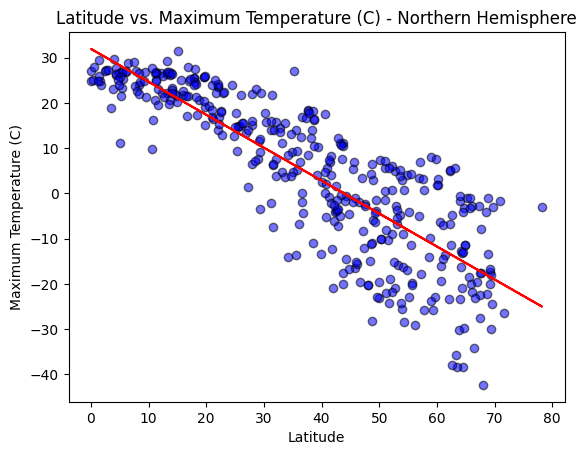

In [22]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='o', facecolors='b', alpha=0.55, edgecolors='k')

def lr_funcV2(x,y,name,vbl,hemi):
    (slope,intercept,rvalue,pvalue,stderror)=linregress(x,y)
    reg_values= x*slope + intercept
    plt.plot(x,reg_values,color='r')
    plt.title(f'Latitude vs. {vbl} - {hemi}')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    print(f'Linear equation: {line_eq}')
    plt.savefig(f"output_data/LinearRegresion_{name}.png")
    print(f'The r-value is: {rvalue}')

x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
name = 'NH_LatVsMaxTemp'
vbl = 'Maximum Temperature (C)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.21x + 27.86
The r-value is: 0.5181039778407645


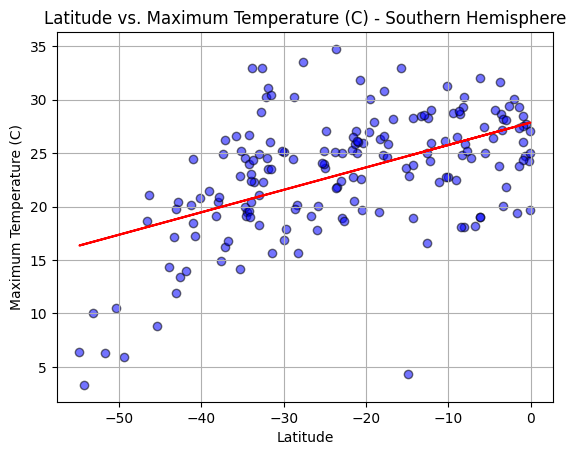

In [24]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], marker='o', facecolors='b', alpha=0.55, edgecolors='k')


plt.grid()

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
name = 'SH_LatVsMaxTemp'
vbl = 'Maximum Temperature (C)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** There seems to generally be an increase in temperature as one approaches the equator. A correlation between latitude and max temperature is also observed, with the Southern Hemisphere having a positive correlation and the Northern Hemisphere having a negative correlation.

### Humidity vs. Latitude Linear Regression Plot

Linear equation: y = 0.43x + 56.76
The r-value is: 0.39940443091481925


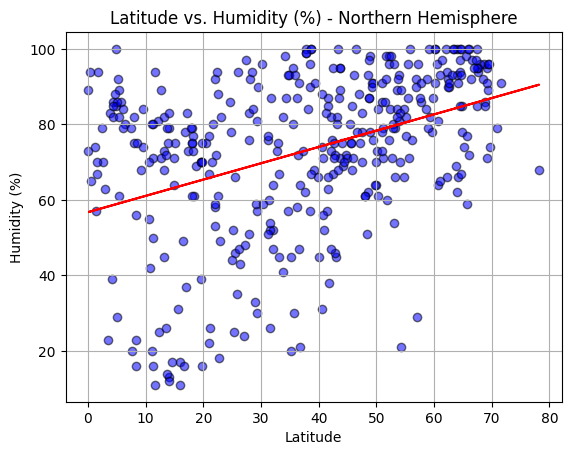

In [25]:
# Northern Hemisphere
# YOUR CODE HERE

plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], marker='o', facecolors='b', alpha=0.55, edgecolors='k')


plt.grid()

x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
name = 'NH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.36x + 82.92
The r-value is: 0.2770277004263547


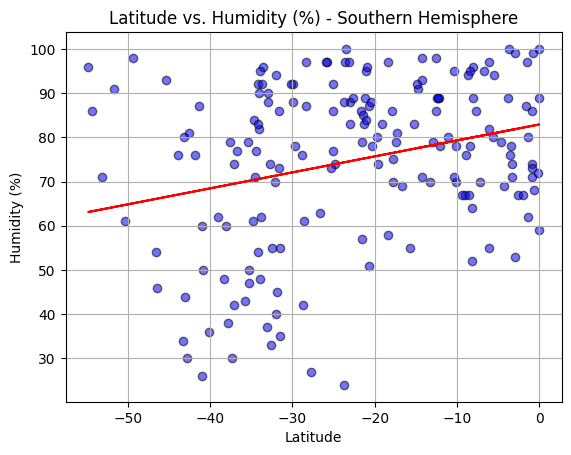

In [26]:
# Southern Hemisphere
# YOUR CODE HERE

# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], marker='o', facecolors='b', alpha=0.55, edgecolors='k')

plt.grid()

x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
name = 'SH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** This set of data doesn't appear to show a strong correlation between latitude and humidity, which makes me think there are other factors that determine humidity.

### Cloudiness vs. Latitude Linear Regression Plot

Linear equation: y = 0.52x + 35.09
The r-value is: 0.24769256989281216


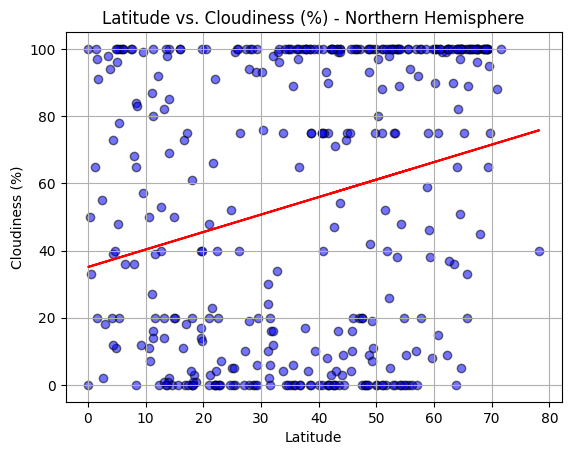

In [27]:
# Northern Hemisphere
# YOUR CODE HERE

plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], marker='o', facecolors='b', alpha=0.55, edgecolors='k')

plt.grid()

x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
name = 'NH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.85x + 76.54
The r-value is: 0.28430227848754636


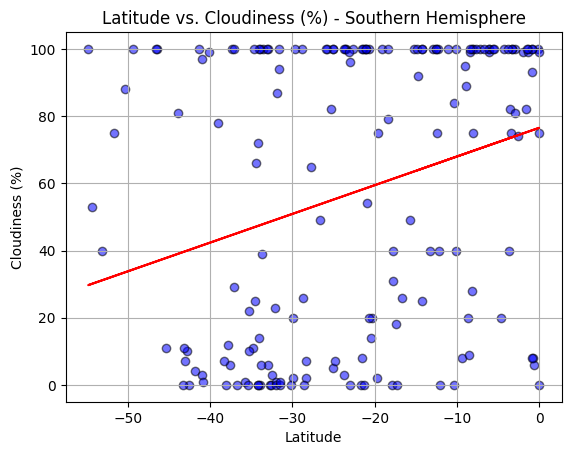

In [28]:
# Southern Hemisphere
# YOUR CODE HERE

plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], marker='o', facecolors='b', alpha=0.55, edgecolors='k')

plt.grid()

x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
name = 'SH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** This seems to be another result where latitude doesn't have a huge effect, and I see little to no linear relationship.

### Wind Speed vs. Latitude Linear Regression Plot

Linear equation: y = 0.01x + 3.64
The r-value is: 0.08262281836780389


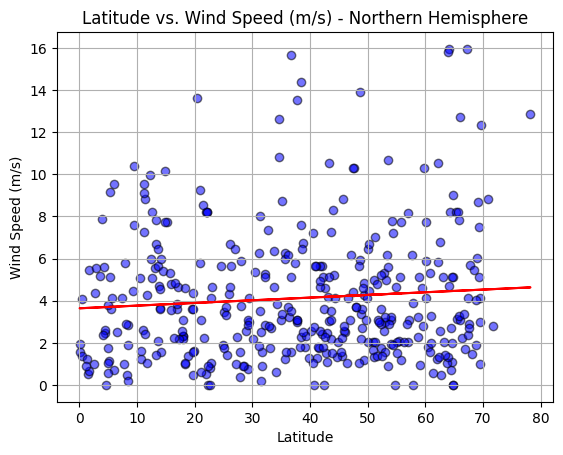

In [29]:
# Northern Hemisphere
# YOUR CODE HERE

plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], marker='o', facecolors='b', alpha=0.55, edgecolors='k')

plt.grid()

x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
name = 'NH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = -0.04x + 2.36
The r-value is: -0.2392257454279037


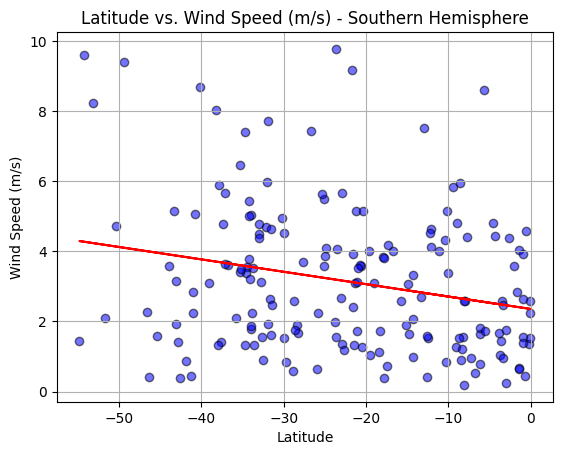

In [30]:
# Southern Hemisphere
# YOUR CODE HERE

plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], marker='o', facecolors='b', alpha=0.55, edgecolors='k')

plt.grid()

x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
name = 'SH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** Wind speed appears to increase as we move away from the equator, but the scatter points are very spread out, so I would call this a weak correlation.